# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras  # install requirement, keras
import keras  # import the keras library

Using TensorFlow backend.


In [0]:
import numpy as np  # import numpy library, numpy is a powerful N-dimensional array object. Read more at https://numpy.org

# import the required Classes and methods from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# import the mnist module
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# fetch mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # X_train, X_test are array of image data and Y_train, y_test are array of category labels

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


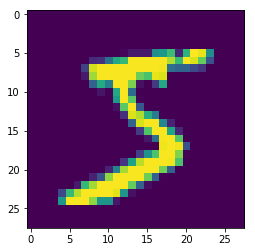

In [4]:
print (X_train.shape)  # print the dimension of X_train array (array of images to train with)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])  # display the 1st image in the training set

In [0]:
# reshape the array of image data from NO_OF_IMAGESX28X28 to NO_OF_IMAGESX28X28X1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
from keras.layers import Activation
model = Sequential()

# The input channel dimension is 28X28X1, i.e., the input has 1 channel of size 28X28 pixels
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # receptive field = 3
model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 5
model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 7
model.add(Convolution2D(32, 3, 3, activation='relu'))  # receptive field = 9

model.add(MaxPooling2D(2))  # receptive field = 18
model.add(Convolution2D(16, 1, 1, activation='relu'))  # receptive field = 18

model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 20
model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 24
model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 26
model.add(Convolution2D(16, 3, 3, activation='relu'))  # receptive field = 28

model.add(Convolution2D(10, 2))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ip

In [37]:
# will display the model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 10, 10, 16)        528       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 8, 8, 16)        

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
# train the model (with training data set), with batch size = 32, for 10 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  416/60000 [..............................] - ETA: 27s - loss: 0.0028 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 26s 426us/step - loss: 0.0140 - acc: 0.9955
Epoch 2/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0135 - acc: 0.9957
Epoch 3/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0106 - acc: 0.9968
Epoch 4/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0134 - acc: 0.9959
Epoch 5/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.0121 - acc: 0.9961
Epoch 6/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0121 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0129 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0112 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0110 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0107 - ac

In [0]:
# evaluate the model with test data set
score = model.evaluate(X_test, Y_test, verbose=0)

In [46]:
print(score)  # print the model accuracy on test data

[0.04971573220908667, 0.9905]


In [0]:
y_pred = model.predict(X_test)  # the predicted value of the model for each image in the test data set in stored in the array `y_pred`

In [48]:
# compare the model prediction for test data set vs. actual result
print(y_pred[:9])
print(y_test[:9])

[[2.56392357e-17 1.30245165e-14 4.29933910e-12 8.07225448e-14
  8.75080264e-19 1.61807252e-11 1.56545333e-26 1.00000000e+00
  4.19162899e-24 9.55918612e-13]
 [4.09411003e-12 8.93847357e-15 1.00000000e+00 3.36931675e-23
  1.57777489e-17 7.57419560e-20 1.89953553e-22 5.51225054e-17
  1.04958218e-17 4.93692409e-19]
 [8.60427113e-14 9.99998450e-01 2.02794634e-08 6.66420315e-14
  1.04933622e-06 6.53645297e-14 2.47223032e-12 5.08365531e-07
  1.02190686e-10 2.35691311e-09]
 [1.00000000e+00 4.63158635e-12 4.07720114e-15 6.26845081e-15
  2.35407695e-13 1.67309024e-13 2.91855873e-09 2.17484616e-16
  6.66737998e-10 1.09957800e-12]
 [3.11510635e-18 1.04320751e-17 5.95715780e-19 8.10776708e-16
  1.00000000e+00 1.67676045e-17 4.56136937e-17 3.05994820e-20
  1.80173378e-14 3.78972027e-12]
 [2.33728534e-17 9.99999881e-01 7.31874214e-11 9.88556403e-17
  1.28830393e-07 1.19687840e-17 3.01478203e-14 2.04542641e-08
  1.82887342e-12 7.46767648e-11]
 [3.49298624e-19 1.67519850e-12 1.83185325e-14 1.38304539e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

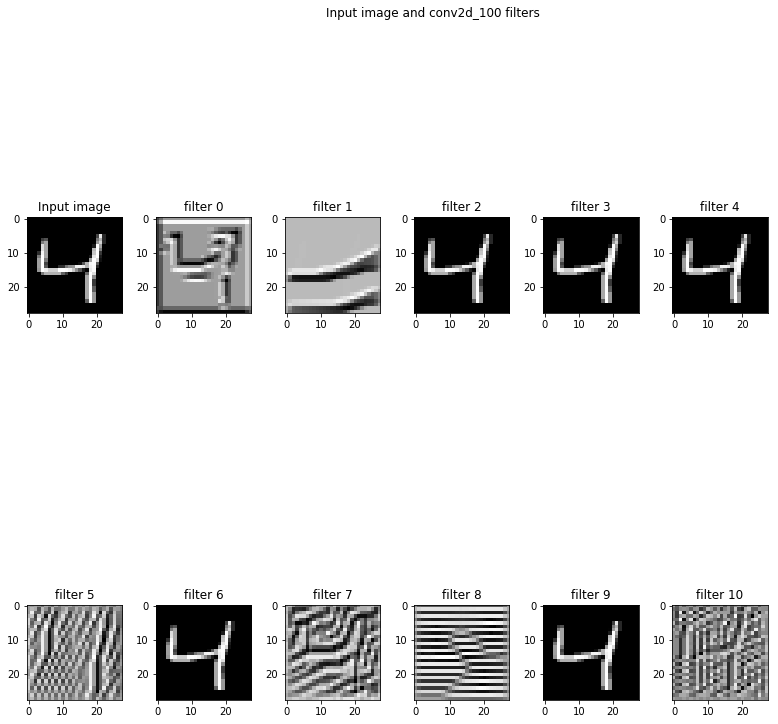

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_100'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()